<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/27_Proportions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proportions

There are many ways to visualize proportions.  We have already seen bar graphs but we'll include them,. stacked bars and pie charts here with `matplotlib` and `seaborn`.

In [1]:
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Activity_Dataset_V1.csv')

df.head()

,Unnamed: 0,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,...,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
0,0,2022-01-01,Freestyle,9.30,77,123,NaN,18.88,168.54,138.30,...,NaN,NaN,112.5,122.0,103,19,28,2,7,50
1,1,2022-01-01,Freestyle,3.44,96,55,NaN,29.65,125.92,292.81,...,NaN,NaN,111.0,122.0,100,42,28,2,29,88
2,2,2022-01-01,Indoor Cycling,6.34,85,33,NaN,17.85,81.93,323.69,...,NaN,NaN,95.0,90.0,100,1,32,0,22,43
3,3,2022-01-01,Walking,7.91,42,82,1571.0,22.10,29.63,180.16,...,28:58,07:58,83.0,85.0,81,3,22,0,24,65
4,4,2022-01-01,Open Water,8.99,36,131,NaN,25.83,64.55,342.89,...,NaN,NaN,138.0,166.0,110,7,0,5,21,88


## Pies and Bars

In [4]:
df.groupby('workout_type').workout_type.agg('count')

workout_type
Cricket            93
Freestyle          96
Indoor Cycling     80
Open Water         91
Outdoor Cycling    85
Outdoor Running    81
Pool Swimming      94
Trail Run          90
Treadmill          98
Trekking           94
Walking            98
Name: workout_type, dtype: int64

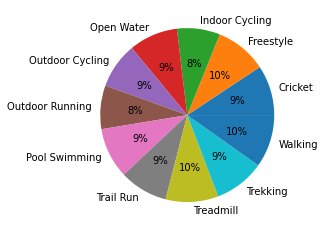

In [7]:
plt.pie(x=df.groupby('workout_type').workout_type.agg('count'),labels = df.groupby('workout_type').workout_type.agg('count').index, autopct='%.0f%%' )
plt.show()

A couple of things about this graphic:

1. It took a fair amount of work with the `groupby` and `index` to create.
2. It is reporting the percentages rather than the raw numbers (we could fix that!)
3. Cricket and Walking are right next to each other and get the same color.

Let's put that same data into a bar chart.

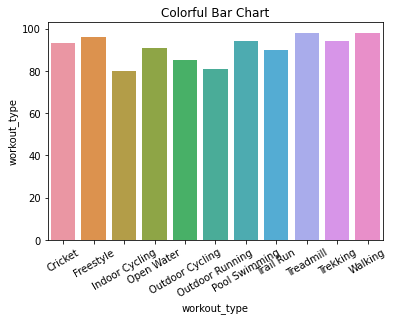

In [11]:
ax = sns.barplot( x= df.groupby('workout_type').workout_type.agg('count').index,
                 y = df.groupby('workout_type').workout_type.agg('count'))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Colorful Bar Chart')

plt.show()

In [13]:
df1 = df.groupby('workout_type').workout_type.agg(count = 'count')
df1 = df1.reset_index()

df1

,workout_type,count
0,Cricket,93
1,Freestyle,96
2,Indoor Cycling,80
3,Open Water,91
4,Outdoor Cycling,85
5,Outdoor Running,81
6,Pool Swimming,94
7,Trail Run,90
8,Treadmill,98
9,Trekking,94


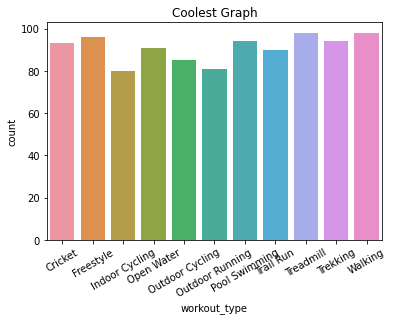

In [14]:

ax = sns.barplot(data = df1,x = 'workout_type', y = 'count')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Coolest Graph')

plt.show()

## Mosaic Plots

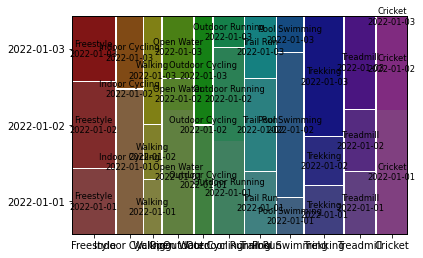

In [18]:
from statsmodels.graphics.mosaicplot import mosaic
df2 = df[(df.activity_day == '2022-01-01')|(df.activity_day == '2022-01-02')|(df.activity_day == '2022-01-03')]
ax = mosaic(df2, [ 'workout_type','activity_day'])

plt.show()

In [22]:
df2.groupby(['workout_type','activity_day']).workout_type.agg('count')

workout_type     activity_day
Cricket          2022-01-01      4
                 2022-01-02      3
Freestyle        2022-01-01      3
                 2022-01-02      4
                 2022-01-03      3
Indoor Cycling   2022-01-01      4
                 2022-01-03      2
Open Water       2022-01-01      4
                 2022-01-02      1
                 2022-01-03      2
Outdoor Cycling  2022-01-01      2
                 2022-01-03      2
Outdoor Running  2022-01-01      3
                 2022-01-02      3
                 2022-01-03      1
Pool Swimming    2022-01-01      1
                 2022-01-02      4
                 2022-01-03      1
Trail Run        2022-01-01      2
                 2022-01-02      3
                 2022-01-03      2
Treadmill        2022-01-01      2
                 2022-01-02      2
                 2022-01-03      3
Trekking         2022-01-01      2
                 2022-01-02      2
                 2022-01-03      5
Walking          2022-01-

## Colors

You can access the seaborn colors with the following code.

In [ ]:
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

There are many options; deep, muted, pastel, bright, dark, and colorblind.

In [ ]:
sns.color_palette('deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [ ]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [47]:
sns.color_palette('coolwarm')

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

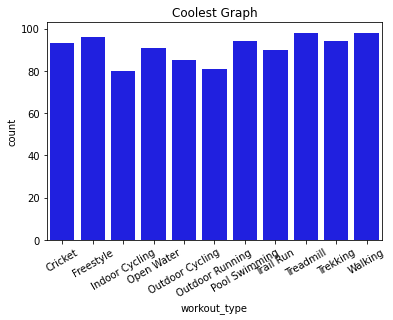

In [38]:

ax = sns.barplot(data = df1,x = 'workout_type', y = 'count', color = 'blue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('One Color Graph')

plt.show()

I was not able to get the following code to work in a Jupyter notebook setting!

In [43]:
sns.set_palette('bright')

Instead I placed the color directly in the graphics command.

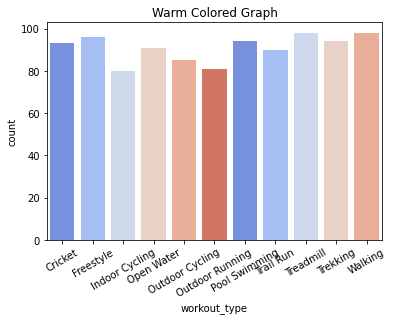

In [54]:
ax = sns.barplot(data = df1,
                 x = 'workout_type', 
                 y = 'count',
                 palette=sns.color_palette('coolwarm', n_colors= 6))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Warm Colored Graph')

plt.show()

## Annotate

You can add context directly to your graphic by using the `annotate` command.

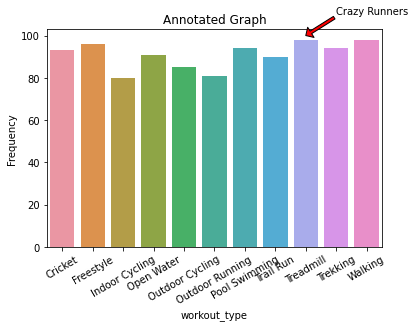

In [39]:
ax = sns.barplot( x= df.groupby('workout_type').workout_type.agg('count').index, y = df.groupby('workout_type').workout_type.agg('count'))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.annotate("Crazy Runners",
            xy = [8,100],
            xytext = [9,110],
            arrowprops = dict(facecolor = 'red', width = 3, headwidth = 12, headlength = 6))
ax.set_title('Annotated Graph')
ax.set_ylabel('Frequency')

plt.show()


## Your Turn

1. Take the first pie chart and create it with the numbers (instead of the percentages) and use a different color scheme that won't have two right next to each other of the same color.  Annotate the graph in some way.
2. Explain what a Mosaic Plot might be able to show you that a pie and bar chart cannot.